In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("./xAPI-Edu-Data.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
## Reading dataset general information:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [5]:
# convert text data to numeric based on unique values
def convert_text_to_numeric(df):
    # make empty dataframe
    new_df = pd.DataFrame()
    for column in df.columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            print(unique_elements)
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
            new_df[column] = df[column]
    return df, new_df

df5_numeric, df_categorical = convert_text_to_numeric(data.copy())
df_categorical
df5_numeric

{'F', 'M'}
{'Syria', 'Palestine', 'KW', 'Lybia', 'Iraq', 'lebanon', 'Iran', 'Egypt', 'Morocco', 'venzuela', 'USA', 'SaudiArabia', 'Tunis', 'Jordan'}
{'Syria', 'Palestine', 'Lybia', 'Iraq', 'lebanon', 'Iran', 'Egypt', 'Morocco', 'venzuela', 'USA', 'SaudiArabia', 'Tunis', 'Jordan', 'KuwaIT'}
{'MiddleSchool', 'HighSchool', 'lowerlevel'}
{'G-12', 'G-07', 'G-05', 'G-11', 'G-08', 'G-10', 'G-06', 'G-02', 'G-04', 'G-09'}
{'A', 'C', 'B'}
{'French', 'Biology', 'Chemistry', 'History', 'Geology', 'Math', 'Science', 'English', 'Quran', 'Arabic', 'IT', 'Spanish'}
{'F', 'S'}
{'Father', 'Mum'}
{'Yes', 'No'}
{'Good', 'Bad'}
{'Above-7', 'Under-7'}
{'L', 'M', 'H'}


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,2,13,2,8,0,10,0,0,15,16,2,20,0,0,1,1
1,1,2,13,2,8,0,10,0,0,20,20,3,25,0,0,1,1
2,1,2,13,2,8,0,10,0,0,10,7,0,30,1,1,0,0
3,1,2,13,2,8,0,10,0,0,30,25,5,35,1,1,0,0
4,1,2,13,2,8,0,10,0,0,40,50,12,50,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,13,12,0,4,0,2,1,0,5,4,5,8,1,1,0,0
476,0,13,12,0,4,0,4,0,0,50,77,14,28,1,1,1,1
477,0,13,12,0,4,0,4,1,0,55,74,25,29,1,1,1,1
478,0,13,12,0,4,0,3,0,0,30,17,14,57,1,1,0,0


In [6]:
numerical_colums = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
data_numeric = df5_numeric[numerical_colums]
data_categorical = df5_numeric.drop(numerical_colums, axis=1)
data_numeric.head()
data_categorical.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,2,13,2,8,0,10,0,0,0,0,1,1
1,1,2,13,2,8,0,10,0,0,0,0,1,1
2,1,2,13,2,8,0,10,0,0,1,1,0,0
3,1,2,13,2,8,0,10,0,0,1,1,0,0
4,1,2,13,2,8,0,10,0,0,1,1,0,1


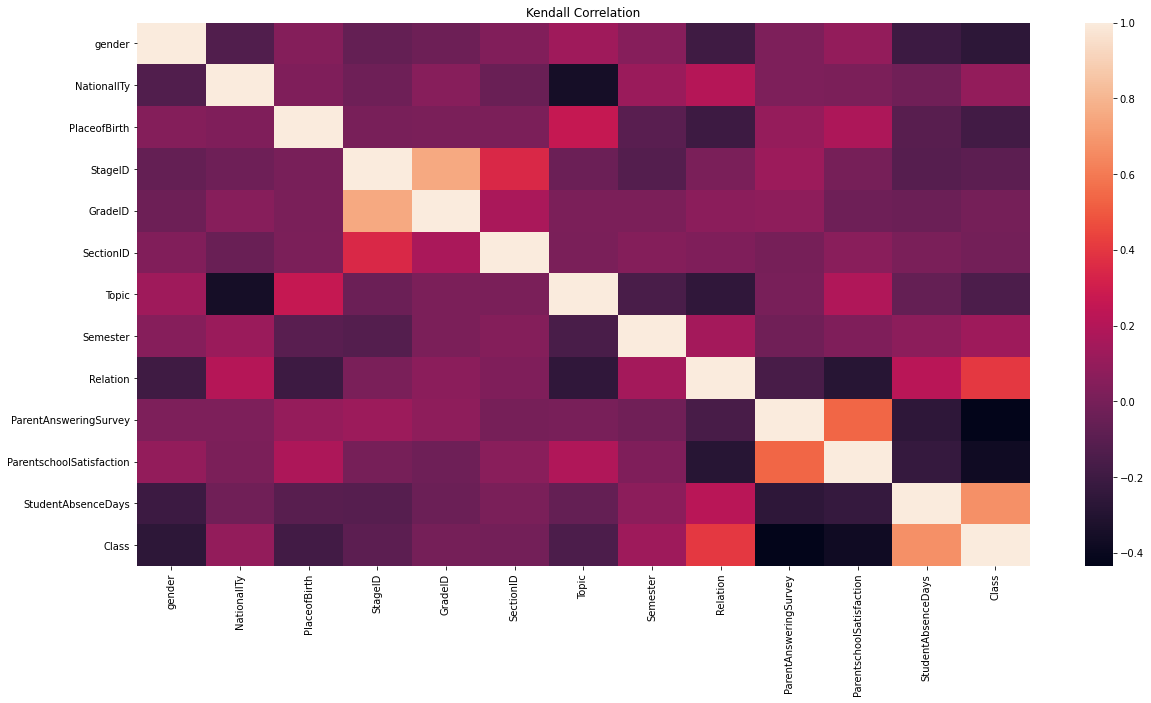

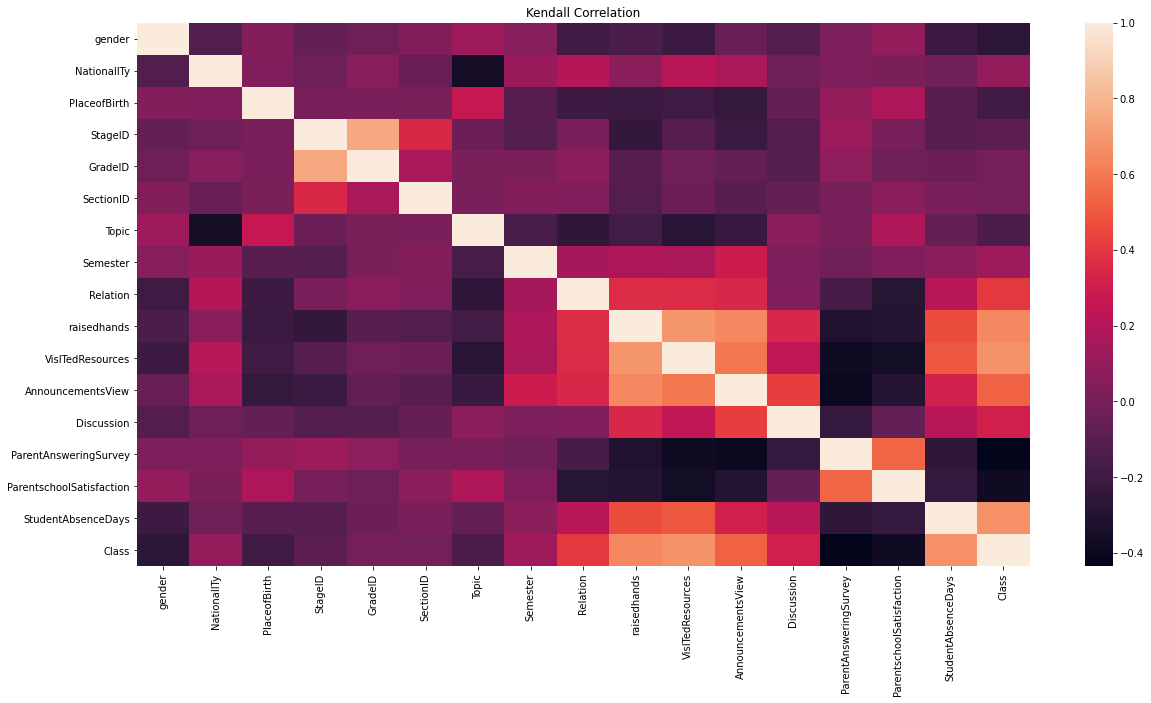

In [7]:
# plot kendall correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df_categorical.corr())
plt.title('Kendall Correlation')
plt.show()

# plot kendall correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df5_numeric.corr())
plt.title('Kendall Correlation')
plt.show()


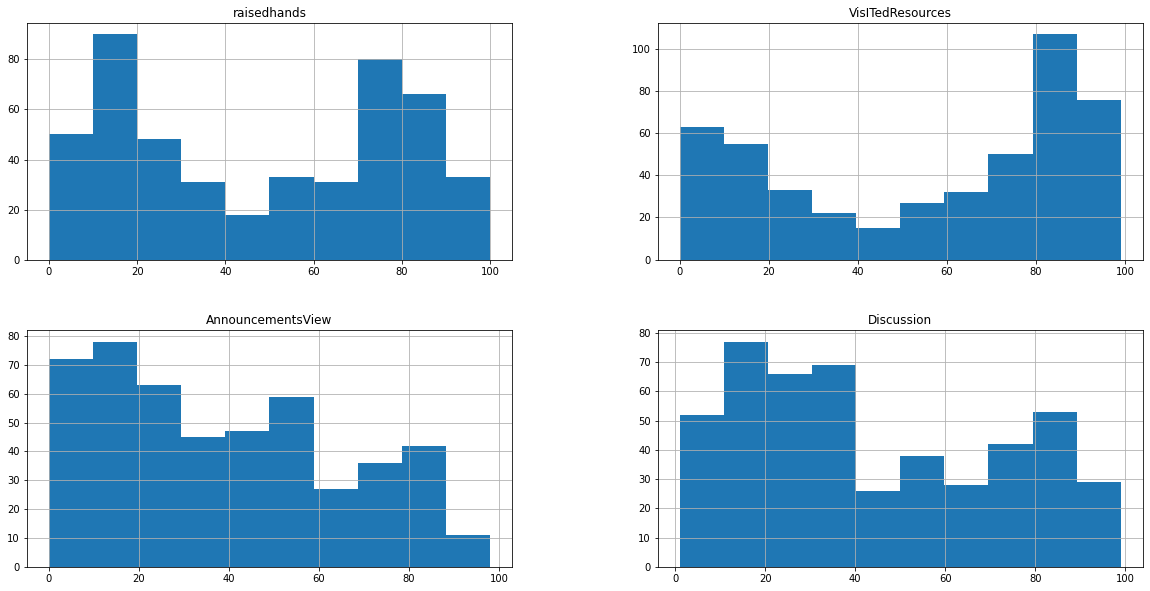

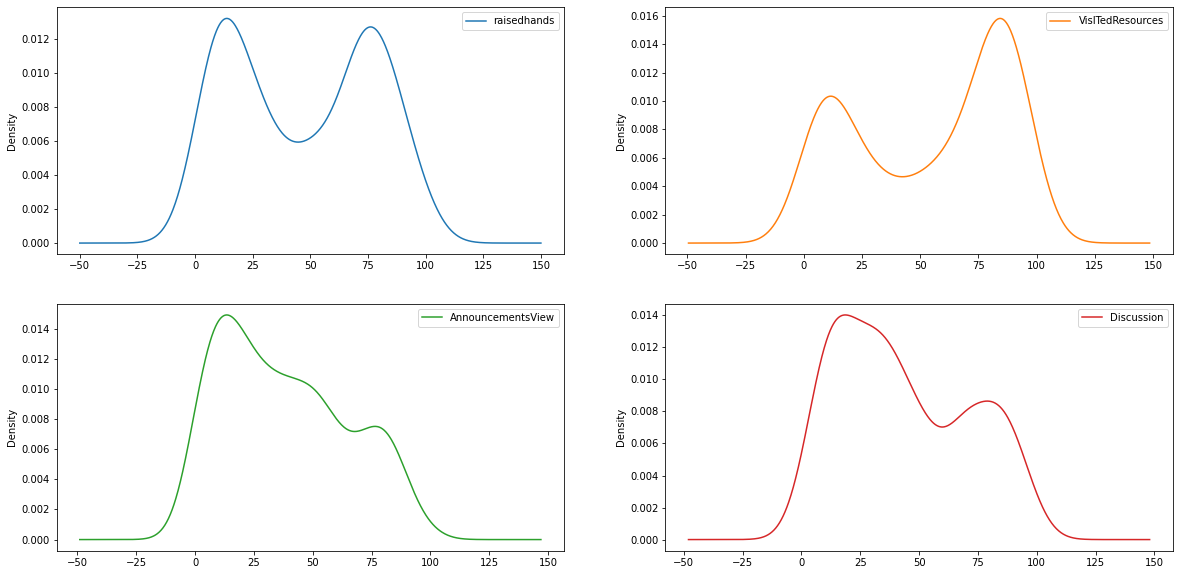

In [8]:
# plot histogram of numeric data
data_numeric.hist(figsize=(20, 10))
plt.show()

# extimate a probability density function
data_numeric.plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize=(20, 10))
plt.show()

### Observations:
- The distribution of the data is not normal, so we cannot use parametric tests.

In [9]:
## Perform Hypothesis Testing
from scipy import stats
import numpy as np

## 1. Is there a significant difference in the average grade of students who are absent and those who are present?
## H0: There is no significant difference in the average grade of students who are absent and those who are present.
## H1: There is a significant difference in the average grade of students who are absent and those who are present.

# run t-test
stats.ttest_ind(df5_numeric[df5_numeric['Class']=='L']['GradeID'], df5_numeric[df5_numeric['Class']=='M']['GradeID'])

# run ANOVA
stats.f_oneway(df5_numeric[df5_numeric['Class']=='L']['GradeID'], df5_numeric[df5_numeric['Class']=='M']['GradeID'])

/home/poorva/.local/lib/python3.8/site-packages/scipy/stats/stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

## Chi-Square test for categorical variables
```https://medium.com/@ritesh.110587/correlation-between-categorical-variables-63f6bd9bf2f7```

In [20]:
df = pd.read_csv("xAPI-Edu-Data.csv")

df_cat = pd.DataFrame(data = df.dtypes, columns = ['a']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])

df_cat = df[cat_var]
cat_var

['gender',
 'NationalITy',
 'PlaceofBirth',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays',
 'Class']

In [21]:
from itertools import product
import scipy.stats as ss

In [22]:
cat_var1 = ('gender', 'NationalITy', 'StageID', 'GradeID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays')
cat_var2 = ('gender', 'NationalITy', 'StageID', 'GradeID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays')
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_cat[i[0]], df_cat[i[1]])))[1]))


In [23]:
result

[('gender', 'NationalITy', 0.014997754560142433),
 ('gender', 'StageID', 0.21984178392095421),
 ('gender', 'GradeID', 0.1494321229221244),
 ('gender', 'Topic', 0.01744724973237198),
 ('gender', 'Semester', 0.32604458862941765),
 ('gender', 'Relation', 2.928549166971103e-05),
 ('gender', 'ParentAnsweringSurvey', 0.6933806327438528),
 ('gender', 'ParentschoolSatisfaction', 0.05107249494015004),
 ('gender', 'StudentAbsenceDays', 7.3829576975348704e-06),
 ('NationalITy', 'gender', 0.014997754560142407),
 ('NationalITy', 'StageID', 8.909144413416853e-10),
 ('NationalITy', 'GradeID', 1.0670911095566858e-28),
 ('NationalITy', 'Topic', 3.303473964491792e-28),
 ('NationalITy', 'Semester', 0.0005782970388494529),
 ('NationalITy', 'Relation', 9.370800462826418e-09),
 ('NationalITy', 'ParentAnsweringSurvey', 0.026121039377948938),
 ('NationalITy', 'ParentschoolSatisfaction', 2.916755790377123e-07),
 ('NationalITy', 'StudentAbsenceDays', 0.0005432640561261366),
 ('StageID', 'gender', 0.219841783920

In [24]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2','coeff'])
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2,GradeID,NationalITy,ParentAnsweringSurvey,ParentschoolSatisfaction,Relation,Semester,StageID,StudentAbsenceDays,Topic,gender
var1,,,,,,,,,,
GradeID,NaN,1.067091e-28,6.200180e-02,9.810023e-01,3.593435e-01,4.865202e-08,2.039254e-191,1.436846e-01,9.242719e-185,0.149432
NationalITy,1.067091e-28,NaN,2.612104e-02,2.916756e-07,9.370800e-09,5.782970e-04,8.909144e-10,5.432641e-04,3.303474e-28,0.014998
ParentAnsweringSurvey,6.200180e-02,2.612104e-02,NaN,8.551301e-32,4.733758e-04,6.703754e-01,2.027414e-02,1.827750e-08,7.639185e-02,0.693381
ParentschoolSatisfaction,9.810023e-01,2.916756e-07,8.551301e-32,NaN,5.362664e-10,6.456246e-01,9.203612e-01,9.193766e-07,1.273334e-02,0.051072
Relation,3.593435e-01,9.370800e-09,4.733758e-04,5.362664e-10,NaN,1.549964e-03,6.301552e-01,2.377983e-06,3.715392e-09,0.000029
Semester,4.865202e-08,5.782970e-04,6.703754e-01,6.456246e-01,1.549964e-03,NaN,3.661541e-03,1.351003e-01,3.055073e-23,0.326045
StageID,2.039254e-191,8.909144e-10,2.027414e-02,9.203612e-01,6.301552e-01,3.661541e-03,NaN,3.214826e-02,9.181760e-46,0.219842
StudentAbsenceDays,1.436846e-01,5.432641e-04,1.827750e-08,9.193766e-07,2.377983e-06,1.351003e-01,3.214826e-02,NaN,3.543310e-01,0.000007
Topic,9.242719e-185,3.303474e-28,7.639185e-02,1.273334e-02,3.715392e-09,3.055073e-23,9.181760e-46,3.543310e-01,NaN,0.017447
